## Diamonds
### Analyze diamonds by their cut, color, clarity, price, and other attributes

In [54]:
import numpy as np
import pandas as pd# Aprendizado de Comitês
import matplotlib.pyplot as plt
import sklearn

df_diamonds = pd.read_csv('datasets/diamonds.csv')
df_diamonds[df_diamonds.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      int64  
 1   carat       0 non-null      float64
 2   cut         0 non-null      object 
 3   color       0 non-null      object 
 4   clarity     0 non-null      object 
 5   depth       0 non-null      float64
 6   table       0 non-null      float64
 7   price       0 non-null      int64  
 8   x           0 non-null      float64
 9   y           0 non-null      float64
 10  z           0 non-null      float64
dtypes: float64(6), int64(2), object(3)
memory usage: 0.0+ bytes


In [ ]:
import missingno as msno
msno.matrix(df_diamonds)

In [ ]:
df_diamonds.head(10)

## Attributes

* ***price*** price in US dollars (\$326--\$18,823)

* ***carat*** weight of the diamond (0.2--5.01)

* ***cut*** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* ***color*** diamond colour, from J (worst) to D (best)

* ***clarity*** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* ***x*** length in mm (0--10.74)

* ***y*** width in mm (0--58.9)

* ***z*** depth in mm (0--31.8)

* ***depth*** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* ***table*** width of top of diamond relative to widest point (43--95)

### Exibi as 10 primeiras linhas do dataset

In [5]:
df_diamonds.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Os ultimos 10 

In [10]:
df_diamonds.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### Existe valor nulo

In [11]:
df_diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Type class cut | color | clarity

In [16]:
print('CUT')
print(df_diamonds['cut'].unique())
print('COLOR')
print(df_diamonds['color'].unique())
print('CLARITY')
print(df_diamonds['clarity'].unique())

CUT
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
COLOR
['E' 'I' 'J' 'H' 'F' 'G' 'D']
CLARITY
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Analyse Exploratory

Attr: Carat
Max : 5.01
Min : 0.2
Variance: 0.22468665982277333
Std : 0.4740112444054184
mean : 0.7979397478680014
median : 0.7
mode: 0    0.3
dtype: float64
1 quartile 25%: 0.4
2 quartile 50%: 0.7
3 quartile 75%: 1.04

IQR: 0.64

Histogram = Positive skewed | prox normal


<AxesSubplot:>

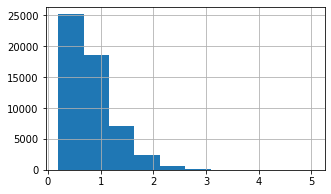

In [6]:
print('Attr: Carat')
df_attr = df_diamonds["carat"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print(f'IQR: {df_attr.quantile(q=0.75)-df_attr.quantile(q=0.25)}\n')
print('Histogram = Positive skewed | prox normal')
df_attr.hist(figsize=(5,3))

Attr: Depth
Max : 79.0
Min : 43.0
Variance: 2.0524038431766978
Std : 1.432621318833661
mean : 61.749404894327036
median : 61.8
mode: 0    62.0
dtype: float64
1 quartile 25%: 61.0
2 quartile 50%: 61.8
3 quartile 75%: 62.5

Histogram = Positive skewed


<AxesSubplot:>

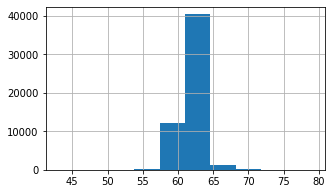

In [18]:
print('Attr: Depth')
df_attr = df_diamonds["depth"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

Attr: Table
Max : 95.0
Min : 43.0
Variance: 4.9929480753375515
Std : 2.2344905628213225
mean : 57.45718390804598
median : 57.0
mode: 0    56.0
dtype: float64
1 quartile 25%: 56.0
2 quartile 50%: 57.0
3 quartile 75%: 59.0

Histogram = Positive skewed


<AxesSubplot:>

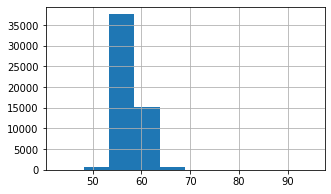

In [19]:
print('Attr: Table')
df_attr = df_diamonds["table"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Price
Max : 18823
Min : 326
Variance: 15915629.42430145
Std : 3989.439738146379
mean : 3932.799721913237
median : 2401.0
mode: 0    605
dtype: int64
1 quartile 25%: 950.0
2 quartile 50%: 2401.0
3 quartile 75%: 5324.25

Histogram = Negatively skewed


<AxesSubplot:>

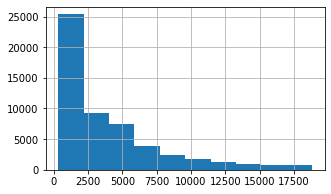

In [20]:
print('Attr: Price')
df_attr = df_diamonds["price"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Negatively skewed')
df_attr.hist(figsize=(5,3))

Attr: X
Max : 10.74
Min : 0.0
Variance: 1.258347173044451
Std : 1.1217607467924928
mean : 5.731157211716722
median : 5.7
mode: 0    4.37
dtype: float64
1 quartile 25%: 4.71
2 quartile 50%: 5.7
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

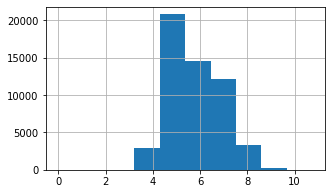

In [21]:
print('Attr: X')
df_attr = df_diamonds["x"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Y
Max : 58.9
Min : 0.0
Variance: 1.3044716138353198
Std : 1.1421346741235552
mean : 5.734525954764553
median : 5.71
mode: 0    4.34
dtype: float64
1 quartile 25%: 4.72
2 quartile 50%: 5.71
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

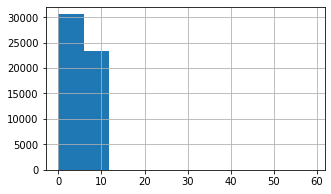

In [22]:
print('Attr: Y')
df_attr = df_diamonds["y"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

Attr: Z
Max : 31.8
Min : 0.0
Variance: 0.4980108625865512
Std : 0.7056988469499941
mean : 3.5387337782721544
median : 3.53
mode: 0    2.7
dtype: float64
1 quartile 25%: 2.91
2 quartile 50%: 3.53
3 quartile 75%: 4.04

Histogram = Positive skewed


<AxesSubplot:>

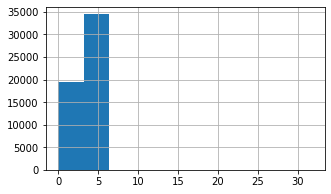

In [23]:
print('Attr: Z')
df_attr = df_diamonds["z"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

### Boxplot

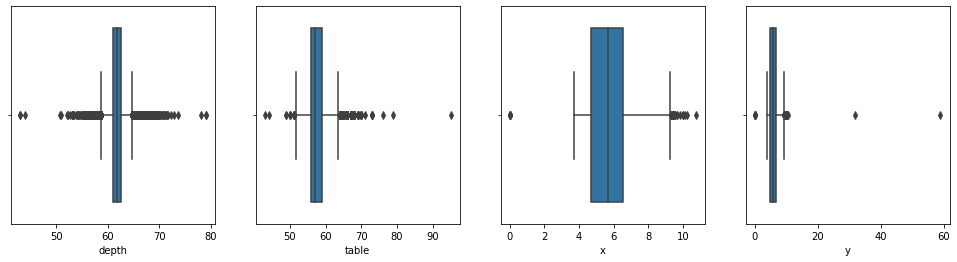

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x=df_number_type[feature])

        
plt.show()

### BoxPlot by Class 

## Class Cut

<AxesSubplot:xlabel='cut', ylabel='count'>

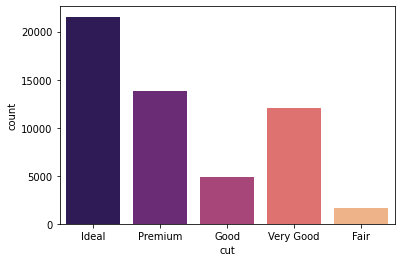

In [35]:
sns.countplot(x='cut',data=df_diamonds,palette="magma")

ValueError: Could not interpret input 'cut'

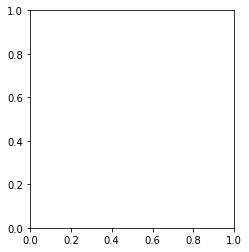

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x='cut',y=feature,data=df_diamonds)        
plt.show()

## Clarity

<AxesSubplot:xlabel='clarity', ylabel='count'>

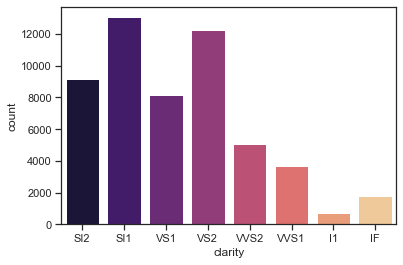

In [13]:
sns.countplot(x='clarity',data=df_diamonds,palette="magma")

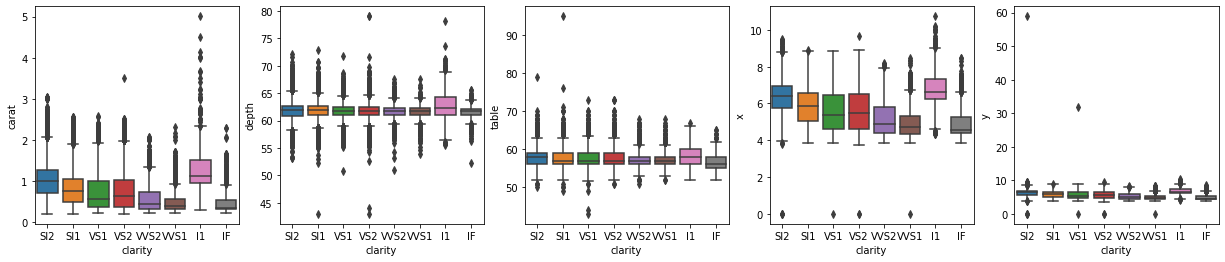

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x='clarity',y=feature,data=df_diamonds)        
plt.show()

## Color

<AxesSubplot:xlabel='color', ylabel='count'>

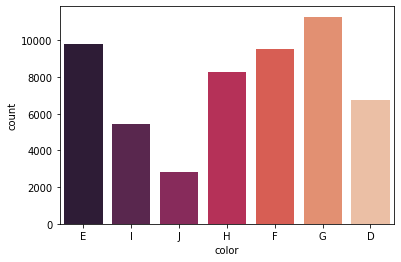

In [37]:
sns.countplot(x='color',data=df_diamonds,palette="rocket")


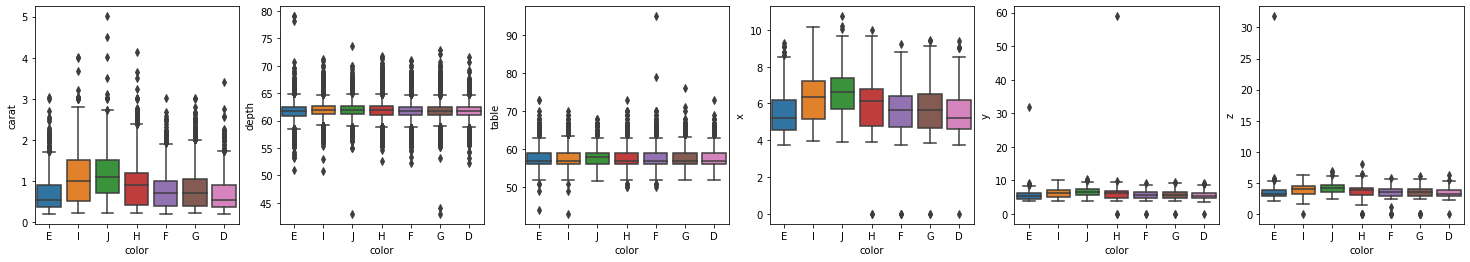

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x='color',y=feature,data=df_diamonds)        
plt.show()

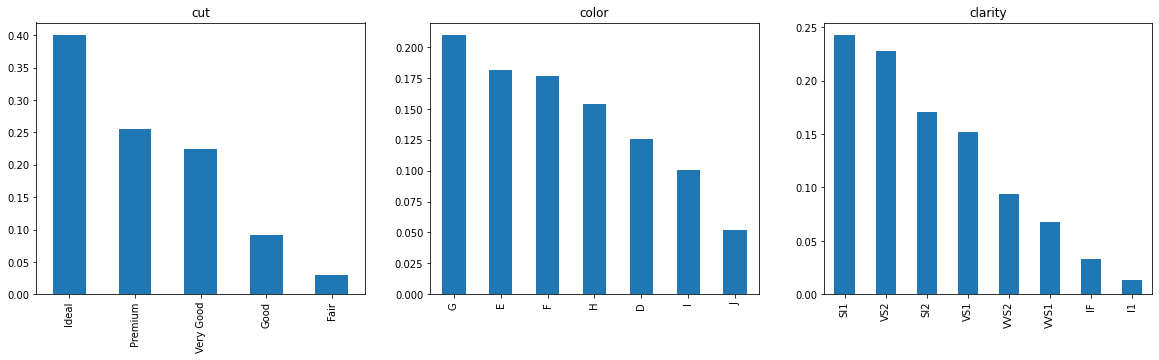

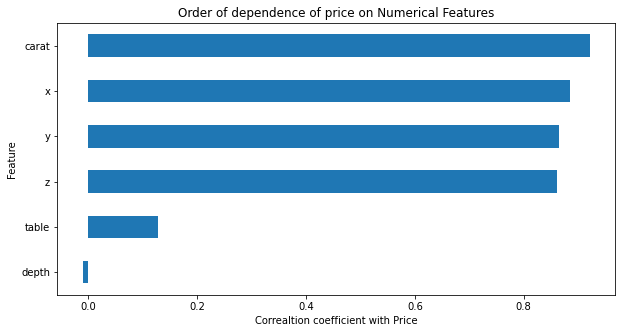

In [38]:
plt.figure(figsize=(20,5))
for i,feature in enumerate(df_diamonds.select_dtypes(include='O').columns.tolist(),1):
    plt.subplot(1,3,i)
    df_diamonds[feature].value_counts(normalize=True).plot.bar()
    plt.title(feature)
    
plt.figure(figsize=(10,5))
df_diamonds.corr()['price'].sort_values()[1:-1].plot.barh()
plt.title('Order of dependence of price on Numerical Features')
plt.xlabel('Correaltion coefficient with Price')
plt.ylabel('Feature')
plt.show()

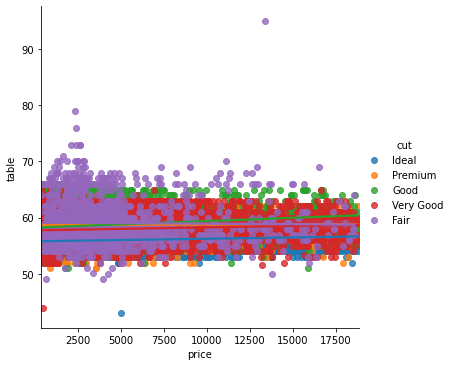

In [16]:
# Color-coded scatter plot with regression lines
sns.lmplot(y='table', x='price', hue='cut', data=df_diamonds)

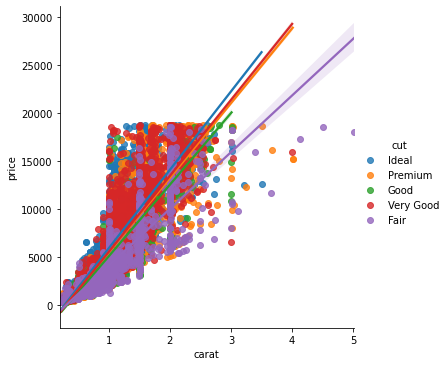

In [13]:
# Color-coded scatter plot with regression lines
sns.lmplot(x='carat', y='price', hue='cut', data=df_diamonds)

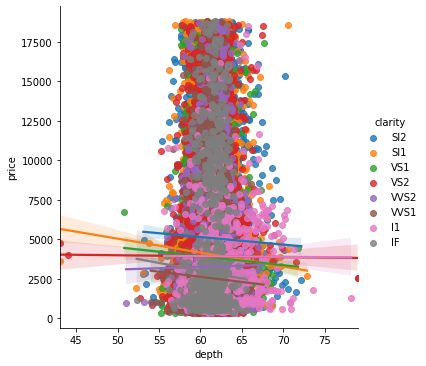

In [14]:
# Color-coded scatter plot with regression lines
sns.lmplot(x='depth', y='price', hue='clarity', data=df_diamonds)

### Heatmap

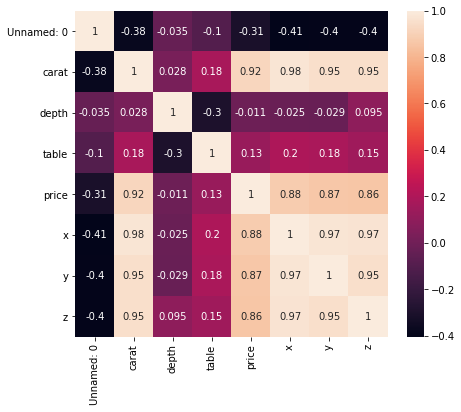

In [34]:
plt.figure(figsize=(7,6))
correlation = df_diamonds.corr()
sns.heatmap(correlation, annot=True)
plt.show()

### Pre Processamento

In [ ]:
### Remove outliers

In [182]:
df_number_type = df_diamonds.select_dtypes(exclude='O').columns[1:]

def range_for_remove_outliers(attr):
    df_attr = df_diamonds[attr]
    q3 = df_attr.quantile(q=0.75)
    q1 = df_attr.quantile(q=0.25)

    IQR  = q3 - q1
    min_IQR = q1 - 1.5 * IQR
    max_IQR = q3 + 1.5 * IQR
    
    return (min_IQR,max_IQR)

def remove_outlier(df_in, col_name):
    range_iqr = range_for_remove_outliers(col_name)
    df_out = df_in[~((df_in < range_iqr[0]) |(df_in > range_iqr[1])).any(axis=1)]
    return df_out


df_diamonds_ro = remove_outlier(df_diamonds, df_number_type)
 
    
df_diamonds_ro.to_csv('datasets/diamonds_remove_outliers.csv',index=False)

Atributo : x
53940
price
326     3.95
326     3.89
327     4.05
334     4.20
335     4.34
        ... 
2757    5.75
2757    5.69
2757    5.66
2757    6.15
2757    5.83
Name: x, Length: 53940, dtype: float64


TypeError: 'Int64Index' object is not callable

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds_ro.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x=df_number_type[feature])

        
plt.show()

NameError: name 'df_diamonds_ro' is not defined

## Regressao linear

In [42]:
# Conver to X & y
df_number_type = df_diamonds.select_dtypes(exclude='O')
y=df_number_type['price']
X=df_number_type.drop('price', axis=1)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=1)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix


In [45]:
sc=StandardScaler()
X_train_tx=sc.fit_transform(X_train)
X_test_tx=sc.transform(X_test)

In [46]:
dataset_1=(X_train, X_test, y_train, y_test, 'dataset_1')

In [47]:
# Blank lists for all the details
model_=[]
cv_score_test=[]
cv_score_train=[]
mse_=[]
mae_=[]
rmse_=[]
r2_=[]

In [48]:
def run_model(model, dataset, modelname):
    model.fit(dataset[0], dataset[2])
    accuracies=cross_val_score(estimator=model, X=dataset[0], y=dataset[2], cv=5, verbose=1)
    y_pred=model.predict(dataset[1])
    print('')
    score_1=model.score(dataset[1], dataset[3])
    print(f'#### {modelname} ####')
    print("score :%.4f" %score_1)
    print(accuracies)
    
    
    mse=mean_squared_error(dataset[3], y_pred)
    mae=mean_absolute_error(dataset[3], y_pred)
    rmse=mean_squared_error(dataset[3], y_pred)**0.5
    r2=r2_score(dataset[3], y_pred)
   
    
    print('')
    print('MSE    : %0.2f ' % mse)
    print('MAE    : %0.2f ' % mae)
    print('RMSE   : %0.2f ' % rmse)
    print('R2     : %0.2f ' % r2)
    
    ## appending to the lists
    
    model_.append(modelname)
    cv_score_test.append(score_1)
    cv_score_train.append(np.mean(accuracies))
    mse_.append(mse)
    mae_.append(mae)
    rmse_.append(rmse)
    r2_.append(r2)

In [49]:
model_dict={'LinearRegression': LinearRegression(), 'LassoRegression': Lasso(normalize=True), 
             'AdaBoostRegressor': AdaBoostRegressor(n_estimators=1000),
            'RidgeRegression': Ridge(normalize=True),
            'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, verbose=1),
           'RandomForestRegressor': RandomForestRegressor(), 
           'KNeighborsRegressor': KNeighborsRegressor()
           }

In [50]:
# run_model(model_dict['LinearRegression'], dataset_1, "LinearRegression")

In [51]:
for models in model_dict:
    run_model(model_dict[models], dataset_1, models)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



#### LinearRegression ####
score :0.8611
[0.8601141  0.85515871 0.86385021 0.85686318 0.85983774]

MSE    : 2158838.67 
MAE    : 905.55 
RMSE   : 1469.30 
R2     : 0.86 

#### LassoRegression ####
score :0.8454
[0.84664714 0.84620141 0.85141459 0.8444506  0.84760685]

MSE    : 2402584.31 
MAE    : 980.92 
RMSE   : 1550.03 
R2     : 0.85 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.2min finished



#### AdaBoostRegressor ####
score :0.9875
[0.98918709 0.99029111 0.99075926 0.9913477  0.99080973]

MSE    : 194216.47 
MAE    : 303.83 
RMSE   : 440.70 
R2     : 0.99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished



#### RidgeRegression ####
score :0.7729
[0.77500592 0.77181094 0.77592831 0.76464178 0.77084216]

MSE    : 3528876.33 
MAE    : 1216.78 
RMSE   : 1878.53 
R2     : 0.77 
      Iter       Train Loss   Remaining Time 
         1    14154820.5543           19.37s
         2    12551947.4294           14.44s
         3    11215196.6146           24.79s
         4    10024374.1165           21.45s
         5     9049180.7672           22.90s
         6     8161238.7715           20.80s
         7     7435634.0832           23.34s
         8     6798288.2557           22.01s
         9     6230404.6579           20.77s
        10     5757126.6662           19.79s
        20     3195232.5282           17.03s
        30     2377074.8209           11.94s
        40     2093347.3915            8.47s
        50     1950787.5021            6.31s
        60     1848688.9737            5.05s
        70     1770057.5748            3.65s
        80     1708542.1965            2.25s
        90     165

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


         6     8246129.4567            2.93s
         7     7504921.2108            3.06s
         8     6853997.5361            3.06s
         9     6283959.3587            3.03s
        10     5800702.9156            2.95s
        20     3207787.4143            2.48s
        30     2385288.5233            2.27s
        40     2098166.5374            2.46s
        50     1955357.7434            2.35s
        60     1852935.4106            2.00s
        70     1774032.6302            1.99s
        80     1712821.2868            1.57s
        90     1663369.4966            0.79s
       100     1623196.1537            0.00s
      Iter       Train Loss   Remaining Time 
         1    14130196.5374            2.96s
         2    12526112.6871           12.84s
         3    11194200.0544           19.96s
         4    10005913.9875           20.67s
         5     9031881.8411           17.36s
         6     8148863.3483           15.46s
         7     7425740.3208           13.87s
         

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished



#### RandomForestRegressor ####
score :0.9999
[0.99985804 0.99982825 0.99989411 0.99981389 0.99989319]

MSE    : 1393.65 
MAE    : 5.45 
RMSE   : 37.33 
R2     : 1.00 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished



#### KNeighborsRegressor ####
score :0.9935
[0.99312903 0.99454886 0.99431777 0.99525537 0.99247625]

MSE    : 101363.53 
MAE    : 34.67 
RMSE   : 318.38 
R2     : 0.99 


In [52]:
accuracy_data=pd.DataFrame(zip(model_, cv_score_test, cv_score_train, mse_, mae_, rmse_, r2_), columns=['Model', 'CV Test score', 'CV Train score (mean)', '%%SVGean Squared error', 'Mean Absolute error', 'Root Mean Squared error', 'R2 Score'])

In [53]:
accuracy_data

,Model,CV Test score,CV Train score (mean),%%SVGean Squared error,Mean Absolute error,Root Mean Squared error,R2 Score
0,LinearRegression,0.861065,0.859165,2.158839e+06,905.550440,1469.298701,0.861065
1,LassoRegression,0.845379,0.847264,2.402584e+06,980.920046,1550.027197,0.845379
2,AdaBoostRegressor,0.987501,0.990479,1.942165e+05,303.829530,440.699976,0.987501
3,RidgeRegression,0.772895,0.771646,3.528876e+06,1216.775628,1878.530365,0.772895
4,GradientBoostingRegressor,0.897679,0.897129,1.589917e+06,770.264346,1260.919306,0.897679
5,RandomForestRegressor,0.999910,0.999857,1.393653e+03,5.450733,37.331659,0.999910
6,KNeighborsRegressor,0.993477,0.993945,1.013635e+05,34.670337,318.376394,0.993477


In [25]:
# tipos_de_avaliacao = ['Com Outiliers sem Normalizacao COSN','Sem Outiliers sem Normalizacao(Unammed)SOSN','Com outiliers e normalizacao CON','Sem Outliers com Normalizacao SON','Com outliers sem unamed com normalizacao', 'Sem outliers sem unamed'] 
# for avaliacao in tipos_de_avaliacao:      

plt.figure(figsize=(20,5))
for i,feature in enumerate(df_diamonds.select_dtypes(include='O').columns.tolist(),1):
    plt.subplot(1,3,i)
    df_diamonds[feature].value_counts(normalize=True).plot.bar()
    plt.title(feature)


,Model,CV Test score,CV Train score (mean),%%SVGean Squared error,Mean Absolute error,Root Mean Squared error,R2 Score
0,LinearRegression,0.861065,0.859165,2.158839e+06,905.550440,1469.298701,0.861065
1,LinearRegression,0.861065,0.859165,2.158839e+06,905.550440,1469.298701,0.861065
2,LassoRegression,0.845379,0.847264,2.402584e+06,980.920046,1550.027197,0.845379
3,AdaBoostRegressor,0.982999,0.989108,2.641776e+05,383.247213,513.982084,0.982999
4,RidgeRegression,0.772895,0.771646,3.528876e+06,1216.775628,1878.530365,0.772895
5,GradientBoostingRegressor,0.897679,0.897129,1.589917e+06,770.264346,1260.919306,0.897679
6,RandomForestRegressor,0.999906,0.999857,1.466881e+03,5.486387,38.299879,0.999906
7,KNeighborsRegressor,0.993477,0.993945,1.013635e+05,34.670337,318.376394,0.993477


['LinearRegression',
 'LinearRegression',
 'LassoRegression',
 'AdaBoostRegressor',
 'RidgeRegression',
 'GradientBoostingRegressor',
 'RandomForestRegressor',
 'KNeighborsRegressor']